#  Phase 2 – Data Summarization and Preprocessing
In this phase, we analyze and prepare our dataset to ensure it is ready for applying data mining techniques later on.  
Our goal is to understand the data better through summarization, visualization, and preprocessing to improve its quality and consistency.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#df = pd.read_csv('/content/Mental_Health_Lifestyle_Dataset.csv')
#df = pd.read_csv('/content/healthy_lifestyle_city_2021.csv')
df = pd.read_csv('/content/drive/My Drive/Raw_dataset.csv')


##  Data Summary
This section provides an overview of the dataset using statistical summaries for numerical features.  
It helps us understand the data’s spread, central tendency, and possible irregularities.

In [ ]:
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


##  Data Visualization
Visualizing the data gives us a better understanding of feature distributions, class balance, and potential outliers.  
Below are different types of plots used to explore the dataset, including **histograms** for numeric data, **bar and pie charts** for categorical distributions, and **boxplots** to detect outliers in numerical attributes.

###  Boxplots and Outlier Visualization
Boxplots help us identify unusual data points (outliers) and understand the spread of numerical variables.  
They are essential for detecting extreme values that may affect model training and accuracy later.

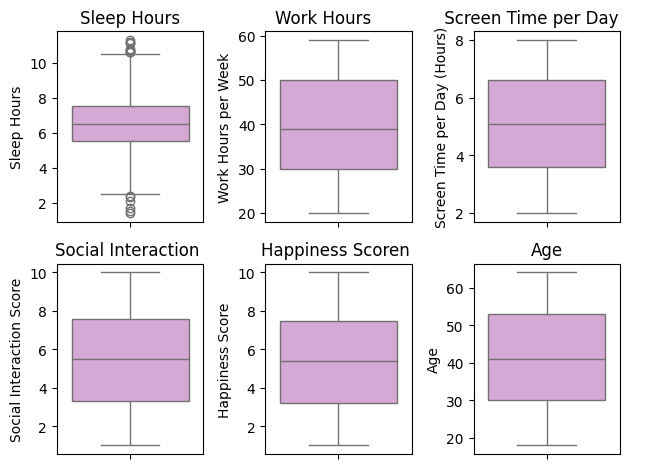

In [ ]:
fig, axes=plt.subplots(2,3)
axes = axes.flatten()
sns.boxplot(data=df,y='Sleep Hours' , ax=axes[0],color='plum')
axes[0].set_title("Sleep Hours")
sns.boxplot(data=df,y='Work Hours per Week' , ax=axes[1],color='plum')
axes[1].set_title("Work Hours      ")
sns.boxplot(data=df,y='Screen Time per Day (Hours)' , ax=axes[2],color='plum')
axes[2].set_title(" Screen Time per Day       ")
sns.boxplot(data=df,y='Social Interaction Score' , ax=axes[3],color='plum')
axes[3].set_title("Social Interaction ")
sns.boxplot(data=df,y='Happiness Score' , ax=axes[4],color='plum')
axes[4].set_title("Happiness Scoren ")
sns.boxplot(data=df,y='Age' , ax=axes[5],color='plum')
axes[5].set_title("Age")
plt.tight_layout()
plt.show();

> Observation:
The data is generally well distributed with no extreme outliers, except in the Sleep Hours attribute. This suggests that the dataset is relatively clean and suitable for further analysis, but special attention should be given to this variable since it contain a few unusual values.

###  Histograms for Numerical Attributes
Histograms illustrate how numerical features are distributed across the dataset.  
They help us detect patterns such as skewed distributions or extreme values.

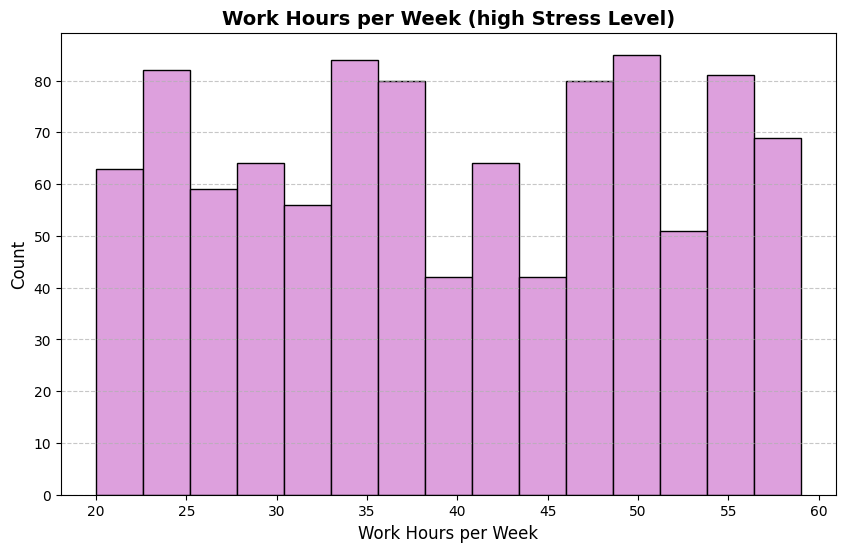

In [ ]:
work_low = df[df['Stress Level'] == 'High']['Work Hours per Week']

plt.figure(figsize=(10, 6))
plt.hist(work_low, bins=15, color='plum', edgecolor='black')

plt.title('Work Hours per Week (high Stress Level)', fontsize=14, fontweight='bold')
plt.xlabel('Work Hours per Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> Observation: **Histogram of Work Hours per Week (High Stress Level):**
The distribution of work hours among individuals with high stress levels appears relatively spread out, with values ranging from 20 to almost 60 hours per week. The counts across bins do not show a strong clear pattern or trend, which suggests that work hours alone may not be a dominant factor in determining stress levels. However, this distribution highlights variability and can be useful when combined with other variables in further analysis.

## Missing Values Analysis
In this section, we check if our dataset contains any missing or incomplete data.  
Handling missing values ensures that no bias or inconsistency affects the analysis later.

In [ ]:
# Missing values summary
df['Mental Health Condition'] = df['Mental Health Condition'].fillna("None")
missing = df.isnull().sum()
print("Total missing values:", missing.sum())
print(missing)

Total missing values: 0
Country                        0
Age                            0
Gender                         0
Exercise Level                 0
Diet Type                      0
Sleep Hours                    0
Stress Level                   0
Mental Health Condition        0
Work Hours per Week            0
Screen Time per Day (Hours)    0
Social Interaction Score       0
Happiness Score                0
dtype: int64




*   At first, Mental Health Condition had 595 missing values (NaN).
*  We replaced them with the category "None", representing participants without a mental health condition
*   After this step, the dataset contains 0 missing values across all attributes.
* This ensures that every column is complete and ready for further analysis (bar plots and class distribution). There are no missing values in the dataset. The column Mental Health Condition originally had 595 NaN values (indicating no mental health issue), which we replaced with the valid category "None". Now the dataset is complete and ready for further analysis.





###  Bar Charts for Categorical Attributes
Bar charts help visualize how often each category appears.  
They make it easier to spot dominant values, rare cases, or imbalances in categorical features like gender, diet type, or exercise level.

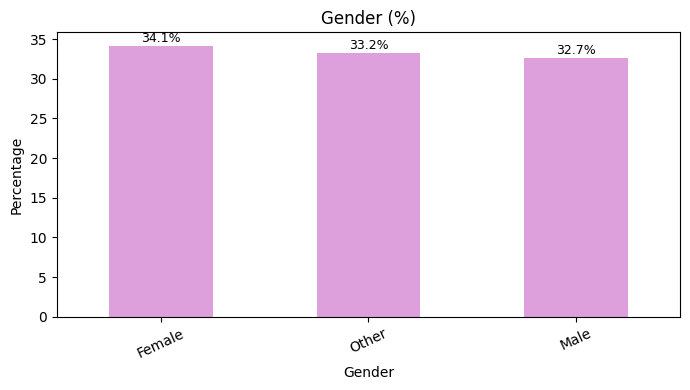

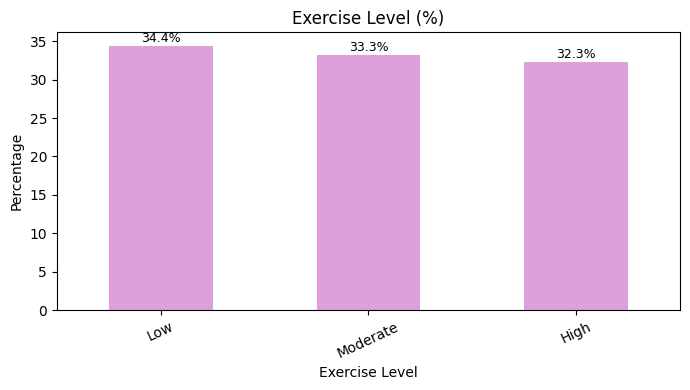

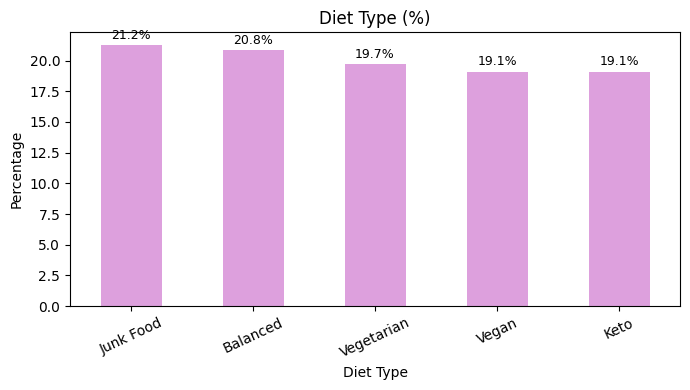

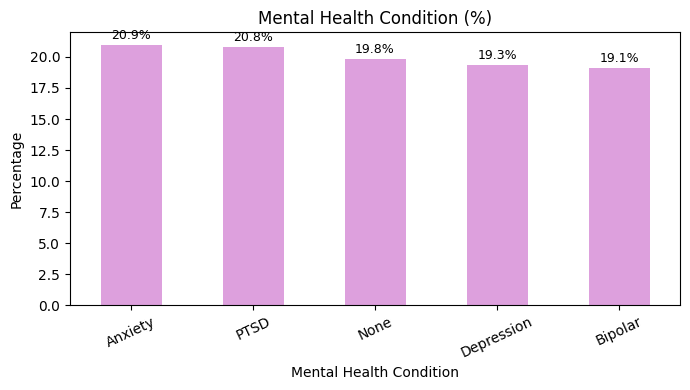

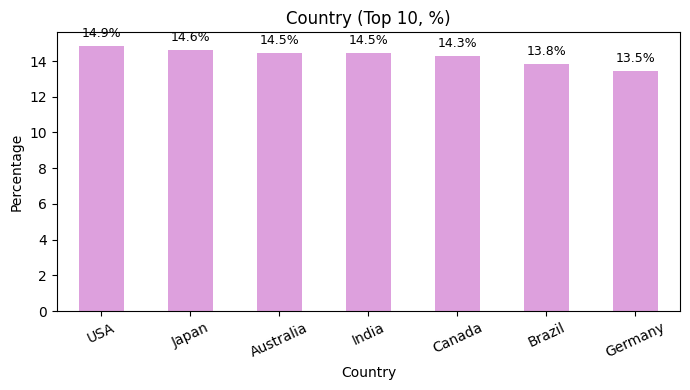

In [ ]:

categorical_cols = ["Gender", "Exercise Level", "Diet Type", "Mental Health Condition", "Country"]

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    if col == "Country":
        vc = df[col].value_counts(normalize=True).nlargest(10) * 100  # top 10 only
        title = f"{col} (Top 10, %)"
    else:
        vc = df[col].value_counts(normalize=True) * 100
        title = f"{col} (%)"

    vc = vc.sort_values(ascending=False)
    ax = vc.plot(kind="bar", color="plum")
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.xticks(rotation=25)


    for i, v in enumerate(vc.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=9)

    plt.tight_layout()
    plt.show()

>
> - `Gender` : balanced (~33% each).
> - `Exercise Level` : close distribution across categories.
> - `Diet Type` : nearly equal across categories; no strong skew.
> - `Mental Health Condition` : fairly balanced; no single condition dominates.
> - `Country` : top-10 shown; one or two countries slightly higher than others.

###  Class Label Distribution
The pie chart below displays the distribution of the target variable (Stress Level).  
This helps us verify if the dataset is balanced or if one class dominates, which affects model performance in the next phase.

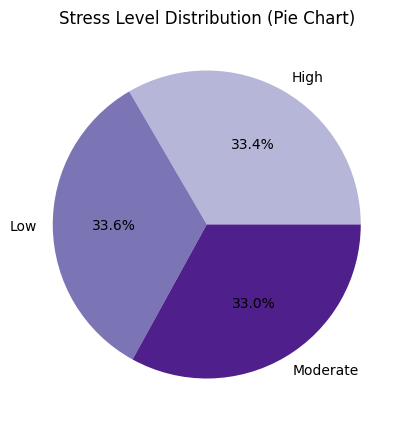

In [ ]:

lbl = "Stress Level"
label_counts = df[lbl].value_counts().sort_index()
perc = (label_counts / label_counts.sum() * 100).round(1)

colors = plt.cm.Purples(np.linspace(0.4, 0.9, 3))

plt.figure(figsize=(5,5))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", colors=colors)
plt.title("Stress Level Distribution (Pie Chart)")
plt.show()

>- The `Stress Level` classes are **well-balanced**: Low (33.6%), High (33.4%), and Moderate (33.0%).  
>- No class dominates, so there is **no imbalance issue** in this target variable.

# Data Preprocessing
After understanding our data, we apply preprocessing techniques to improve its quality and make it ready for machine learning models.  
This includes outlier removal, encoding categorical variables, and discretizing numerical features for better interpretability.

Data preprocessing is a crucial step in any data analysis or machine learning project, as it ensures that the dataset is clean, consistent, and properly structured before applying analytical or modeling techniques. Real-world datasets often contain missing values, noise, or inconsistencies that can negatively impact the performance and accuracy of models if not addressed.

In our project, the dataset was already relatively clean and well-structured, with minimal missing values or inconsistencies. Therefore, we focused our preprocessing efforts on essential tasks that further improved the dataset’s quality and suitability for analysis. The main preprocessing steps we applied were Outlier Removal, Discretization and Encoding

###  Handling Missing Values
We replace missing values to prevent errors during analysis.  
Depending on the data type, we use mean/median for numeric attributes or “None” for categorical values.

> In our dataset, empty cells in the "Mental Health Condition" column were replaced with the label **"None"**, indicating participants with no reported condition.  
> This ensures that the dataset remains complete and consistent without removing any records.

Data before cleaning:

---



This is the original DataFrame before applying any preprocessing steps. At this stage, the data still contains outliers, unencoded categorical values, and undiscretized numerical features. It represents the raw version of the dataset before we performed cleaning, transformation, and preparation to improve its quality for analysis and modeling.

In [ ]:
print(df)

        Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0        Brazil   48    Male            Low  Vegetarian          6.3   
1     Australia   31    Male       Moderate       Vegan          4.9   
2         Japan   37  Female            Low  Vegetarian          7.2   
3        Brazil   35    Male            Low       Vegan          7.2   
4       Germany   46    Male            Low    Balanced          7.3   
...         ...  ...     ...            ...         ...          ...   
2995      Japan   57  Female       Moderate    Balanced          7.0   
2996  Australia   27    Male            Low   Junk Food          7.1   
2997  Australia   42    Male       Moderate    Balanced          6.0   
2998  Australia   25    Male           High        Keto          5.7   
2999      Japan   28  Female           High       Vegan          6.9   

     Stress Level Mental Health Condition  Work Hours per Week  \
0             Low                    None                   21   
1  

### Outlier Detection and Removal
To ensure data accuracy, we remove records with extremely high or low values that fall far outside the normal range.

In [ ]:

num_cols= df.select_dtypes(include=[np.number]).columns

z_scores = df[num_cols].apply(zscore)

threshold = 2
outliers = df[(abs(z_scores) > threshold).any(axis=1)]

print("Outliers based on z-scores for the selected columns: \n")
display(outliers)


Outliers based on z-scores for the selected columns: 



,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
5,Japan,23,Other,Moderate,Balanced,2.7,Moderate,Anxiety,50,3.3,8.4,7.2
9,Germany,19,Female,Moderate,Vegan,3.3,Low,PTSD,44,7.7,3.0,7.7
12,Germany,48,Male,High,Balanced,2.6,Moderate,Anxiety,52,3.9,1.6,5.1
21,Canada,32,Male,High,Junk Food,3.0,High,PTSD,25,3.0,2.3,4.4
43,Canada,53,Other,Moderate,Junk Food,1.4,High,Bipolar,22,4.7,4.1,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2820,USA,38,Other,Moderate,Junk Food,2.5,Low,Bipolar,34,3.3,7.1,5.1
2929,Germany,51,Male,Low,Keto,3.4,Low,PTSD,36,7.8,6.9,8.4
2933,Japan,26,Male,Moderate,Vegan,10.6,Low,Depression,44,3.4,6.8,9.7
2935,India,37,Female,Low,Vegan,9.7,High,None,53,5.9,2.2,4.2


# removing outlier

In [ ]:
def remove_outliers_iqr(df, class_label):
    outlier_indices = set()

    # Select numerical columns except the target label
    numerical_cols = df.select_dtypes(include='number').columns.difference([class_label])

    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Find outliers outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
        outlier_indices.update(outliers)

    # Create a new DataFrame without outliers
    df_cleaned = df.drop(index=outlier_indices)
    return df_cleaned

# Apply the function to your dataset
df_cleaned = remove_outliers_iqr(df, 'Stress level')

print("Data after removing outliers:")
print(df_cleaned)
print(f"\nRows before: {len(df)}, Rows after cleaning: {len(df_cleaned)}")

Data after removing outliers:
        Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0        Brazil   48    Male            Low  Vegetarian          6.3   
1     Australia   31    Male       Moderate       Vegan          4.9   
2         Japan   37  Female            Low  Vegetarian          7.2   
3        Brazil   35    Male            Low       Vegan          7.2   
4       Germany   46    Male            Low    Balanced          7.3   
...         ...  ...     ...            ...         ...          ...   
2995      Japan   57  Female       Moderate    Balanced          7.0   
2996  Australia   27    Male            Low   Junk Food          7.1   
2997  Australia   42    Male       Moderate    Balanced          6.0   
2998  Australia   25    Male           High        Keto          5.7   
2999      Japan   28  Female           High       Vegan          6.9   

     Stress Level Mental Health Condition  Work Hours per Week  \
0             Low                    No

In this step, we removed the outliers from the dataset to make the data cleaner and ensure that the analysis and model training are not affected by extreme or abnormal values. The outlier removal was specifically applied to the numerical columns in the dataset, as these are the ones where extreme values can significantly distort statistical analysis and model performance.

# ***Data transfomation:***

# Discretization

In [ ]:
# make sure that the  age bins based on the range (18-64)
age_bins =  [18, 30, 40, 50, 65]
age_labels = ['18-29', '30-39', '40-49', '50-64']
# Check for NaN values in the age column
print(df_cleaned['Age'].isna().sum())

# Perform discretization
df_cleaned['Age'] = pd.cut(df_cleaned['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display  the  discretized values
print(" Discretized Age:")
print(df_cleaned[ 'Age'])

0
 Discretized Age:
0       40-49
1       30-39
2       30-39
3       30-39
4       40-49
        ...  
2995    50-64
2996    18-29
2997    40-49
2998    18-29
2999    18-29
Name: Age, Length: 2984, dtype: category
Categories (4, object): ['18-29' < '30-39' < '40-49' < '50-64']


The **Age** column was chosen for the **discretization process** as it is a **continuous numerical variable**. Converting continuous age values into intervals helps analyze how **stress levels** differ across age groups. Since the dataset covers ages from **18 to 64 years**, the range was divided into **equal-width bins** to create balanced and interpretable groups:

* **18–29:** young adults
* **30–39:** early middle age
* **40–49:** middle age
* **50–64:** older adults

### Encoding Categorical Variables
Categorical variables are converted into numerical form using Label Encoding so that the data can be processed by machine learning models.

In [ ]:

mapping = {'High': 2, 'Moderate': 1, 'Low': 0}
df_cleaned['Stress Level'] = df_cleaned['Stress Level'].map(mapping)

# Display the columns after encoding
print(df_cleaned['Stress Level'])



0       0
1       0
2       2
3       0
4       0
       ..
2995    2
2996    0
2997    2
2998    0
2999    2
Name: Stress Level, Length: 2984, dtype: int64



The **Stress Level** column was encoded numerically to facilitate statistical analysis and model processing. Each qualitative category was replaced with a corresponding numeric value to ensure consistency and simplify computation. The encoding followed a logical ranking based on intensity, where **“High” was assigned 2**, **“Moderate” was assigned 1**, and **“Low” was assigned 0**, reflecting an Ascending order of stress intensity.

*clean data:*

---



This is the clean DataFrame after applying the preprocessing steps. At this stage, the data has been cleaned from outliers, encoded into numerical values, and discretized where necessary. These transformations improved the dataset’s quality, consistency, and structure, making it more suitable and reliable for further analysis and machine learning model training.

In [ ]:
print(df_cleaned)

        Country    Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0        Brazil  40-49    Male            Low  Vegetarian          6.3   
1     Australia  30-39    Male       Moderate       Vegan          4.9   
2         Japan  30-39  Female            Low  Vegetarian          7.2   
3        Brazil  30-39    Male            Low       Vegan          7.2   
4       Germany  40-49    Male            Low    Balanced          7.3   
...         ...    ...     ...            ...         ...          ...   
2995      Japan  50-64  Female       Moderate    Balanced          7.0   
2996  Australia  18-29    Male            Low   Junk Food          7.1   
2997  Australia  40-49    Male       Moderate    Balanced          6.0   
2998  Australia  18-29    Male           High        Keto          5.7   
2999      Japan  18-29  Female           High       Vegan          6.9   

      Stress Level Mental Health Condition  Work Hours per Week  \
0                0                    None  

### Saving the Preprocessed Dataset
After applying all preprocessing steps, the final cleaned dataset is saved for use in Phase 3.

In [ ]:
df_cleaned.to_csv("The_Processed_data.csv")

# Summary of Phase 2
In this phase, we performed detailed data analysis and preprocessing on our dataset.  
We visualized the data to understand its patterns, identified and handled outliers, and applied encoding and discretization to improve data consistency.  
The dataset is now fully cleaned, well-structured, and ready for classification and clustering in **Phase 3**.